# Load Library and Get Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

# Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [4]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Impact of Education on Company Type

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Impact of Education on Company Type')

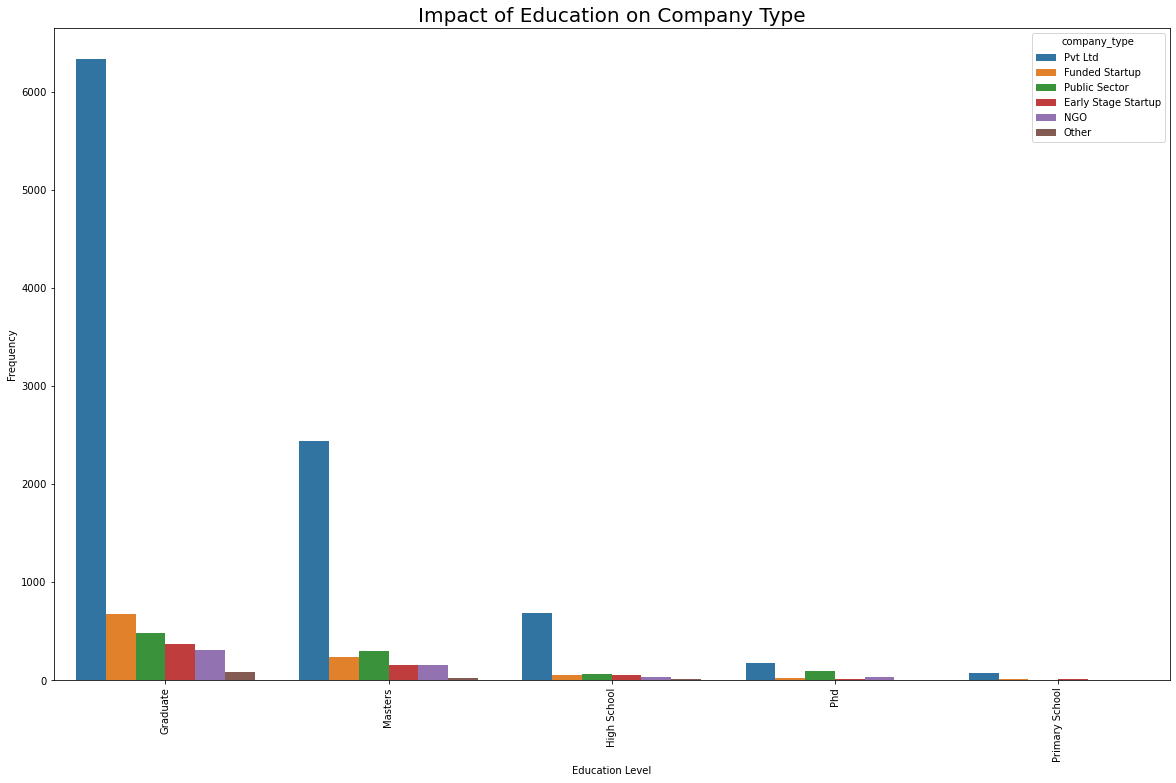

In [5]:
temp = data[['education_level', 'company_type']]
temp.dropna(axis=0, inplace = True)
value_counts = temp.value_counts().to_frame()
value_counts.reset_index(level=[0, 1], inplace=True)
value_counts = value_counts.rename(columns = {0:'count'})
bar, ax = plt.subplots(figsize=(20,12))
sns.barplot(x = 'education_level', y = 'count', data = value_counts, hue='company_type')
plt.xticks(rotation = 90)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Impact of Education on Company Type', fontsize=20)

# Top Three Discipline

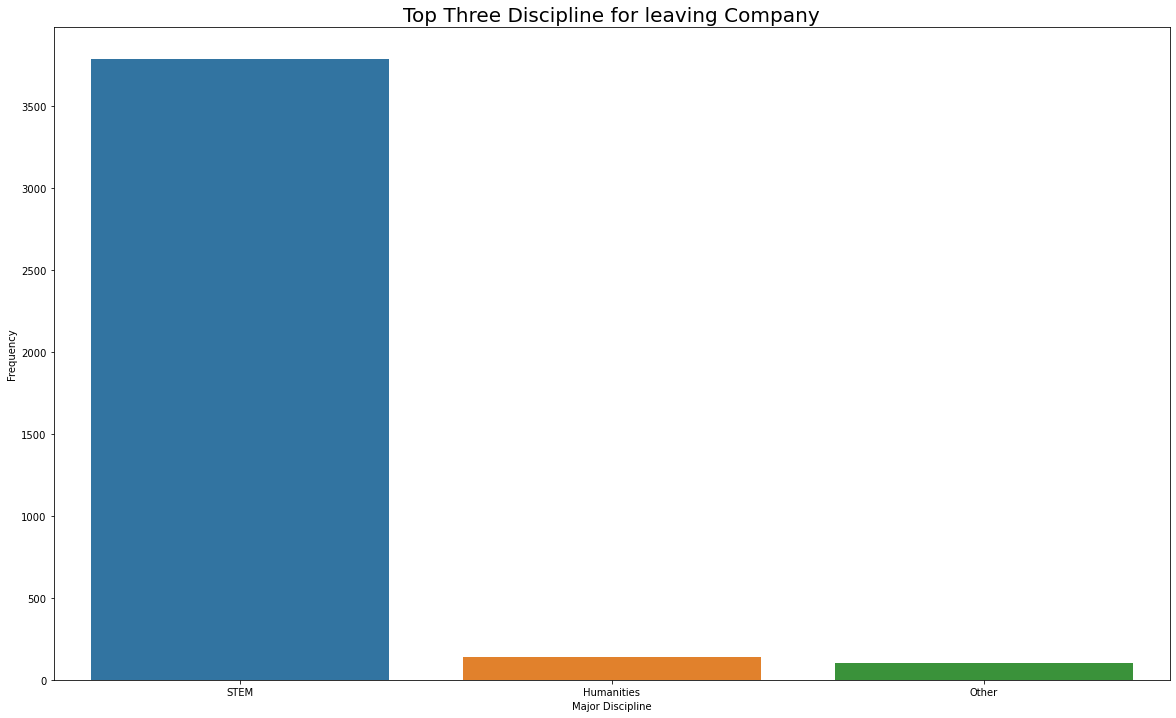

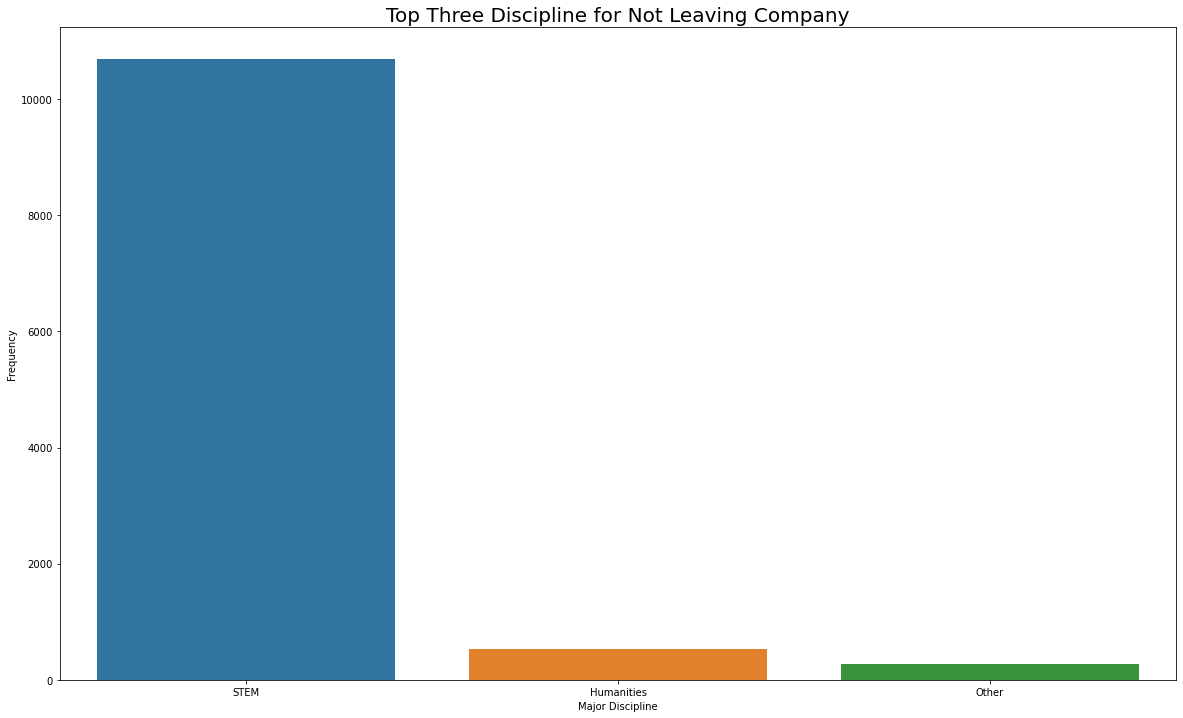

In [6]:
title = ['Top Three Discipline for leaving Company', 'Top Three Discipline for Not Leaving Company']
for index, target in enumerate(data['target'].unique()):
    major_discipline = data[data['target'] == target]['major_discipline']
    temp = major_discipline.value_counts().to_frame()
    temp.reset_index(level=[0], inplace= True)
    top_three = temp.iloc[:3,:]
    bar, ax = plt.subplots(figsize=(20,12))
    sns.barplot(x = 'index', y = 'major_discipline', data = top_three)
    plt.xlabel('Major Discipline')
    plt.ylabel('Frequency')
    plt.title(title[index], fontsize=20)


# Distribution over Gender

Text(0.5, 1.0, 'Impact of Gender on leaving company')

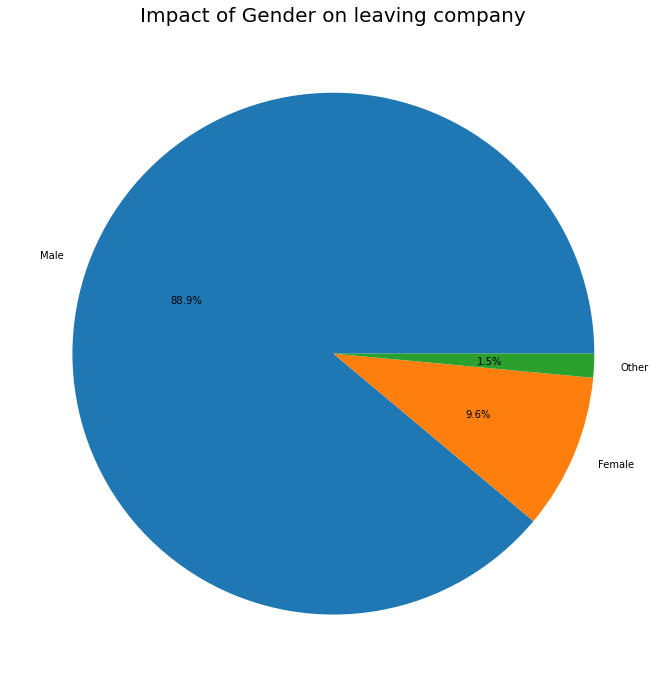

In [7]:
gender = data[data['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(20,12))
plt.pie(x = temp, labels = labels, autopct="%.1f%%")
plt.title('Impact of Gender on leaving company', fontsize=20)

# Box Plot with repect to Training Hours

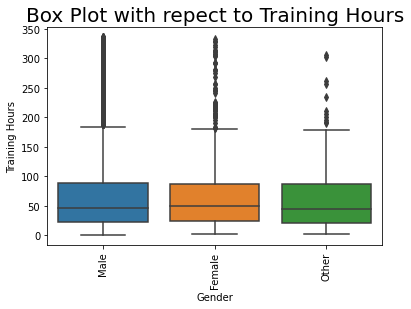

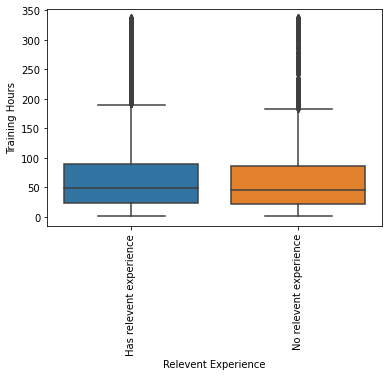

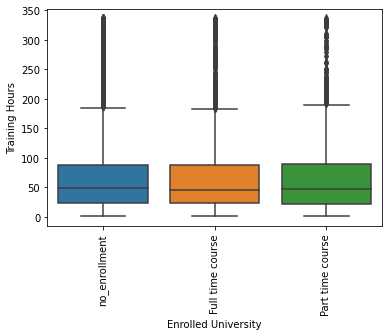

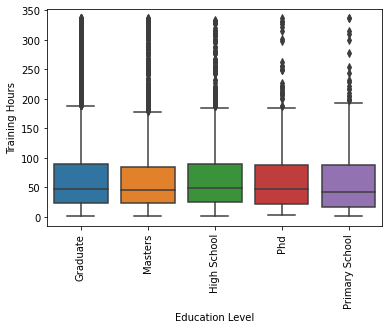

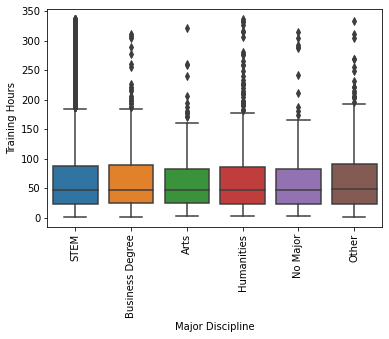

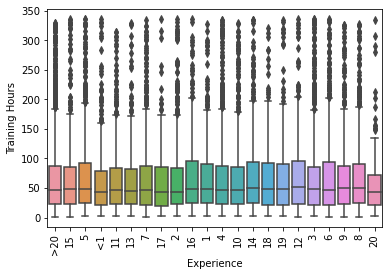

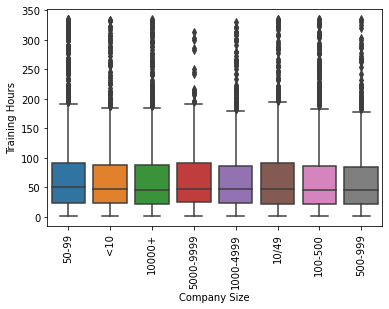

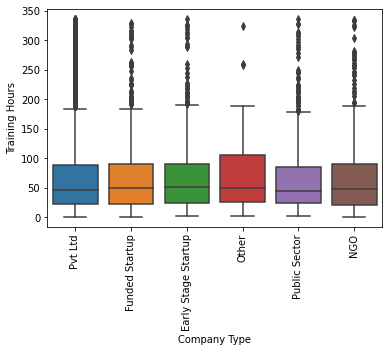

In [8]:
plt.title('Box Plot with repect to Training Hours', fontsize=20)
for temp in data.columns:
    if data[temp].dtypes == 'object' and temp not in ['city', 'last_new_job']:
       
        sns.boxplot(x = temp, y ='training_hours', data=data)
        plt.xticks(rotation=90)
        plt.xlabel(' '.join(x.capitalize() for x in temp.split('_')))
        plt.ylabel('Training Hours')
        plt.show()
    
       

# Impact of Company type on leaving company

Text(0.5, 1.0, 'Impact of Company type on leaving company')

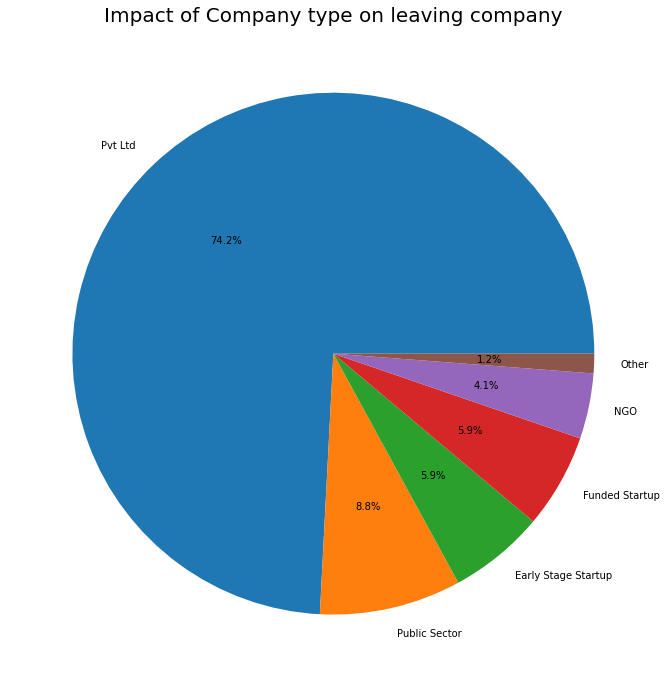

In [9]:
company_type = data[data['target'] == 1]['company_type']
temp = company_type.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(20,12))
plt.pie(x = temp, labels = labels, autopct="%.1f%%")
plt.title('Impact of Company type on leaving company', fontsize=20)

# Tenure Working in Company V/S Swiching Company

In [10]:
data['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [11]:
class_one = 'less than a year'
class_two = 'more than a year'
job_status = list()
for ind, temp in data.iterrows():
    if temp['last_new_job'] == '1':
        temp_class = class_one
    else:
        temp_class = class_two
    if temp['target'] == 0.0:
        classes = 'Will Not Leave'
    else:
        classes = 'Will Leave'
    job_status.append([temp_class, classes])
    
job_change_frequency = pd.DataFrame(job_status, columns = ['Classes', 'Target'])
job_change_frequency

,Classes,Target
0,less than a year,Will Leave
1,more than a year,Will Not Leave
2,more than a year,Will Not Leave
3,more than a year,Will Leave
4,more than a year,Will Not Leave
...,...,...
19153,less than a year,Will Leave
19154,more than a year,Will Leave
19155,more than a year,Will Not Leave
19156,more than a year,Will Not Leave


Text(0.5, 1.0, 'Tenure Working in Company V/S Swiching Company')

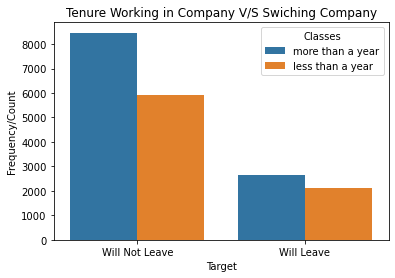

In [12]:
df = job_change_frequency.value_counts().to_frame()
df.reset_index(level=[0,1], inplace=True) 
df = df.rename(columns={0: 'temp'})
sns.barplot(x='Target', y = 'temp', data = df, hue='Classes')
plt.xlabel('Target')
plt.ylabel('Frequency/Count')
plt.title('Tenure Working in Company V/S Swiching Company')

# Impact of Company Size on Target

In [13]:
size_details = list()
company_size = data['company_size'].unique()
for element in company_size:
    for target in data['target'].unique():
        company_target = data[(data['company_size'] == element) & (data['target'] == target)]
        count = company_target.shape[0]
        if target == 1.0:
            temp_target = 'Will Leave'
        else:
            temp_target = 'Will Not Leave'
            
        size_details.append([element, temp_target, count])
company_size = pd.DataFrame(size_details, columns=['size', 'target', 'count'])
company_size

,size,target,count
0,NaN,Will Leave,0
1,NaN,Will Not Leave,0
2,50-99,Will Leave,545
3,50-99,Will Not Leave,2538
4,<10,Will Leave,224
5,<10,Will Not Leave,1084
6,10000+,Will Leave,385
7,10000+,Will Not Leave,1634
8,5000-9999,Will Leave,102
9,5000-9999,Will Not Leave,461


Text(0.5, 1.0, 'Impact of Company Size on Target')

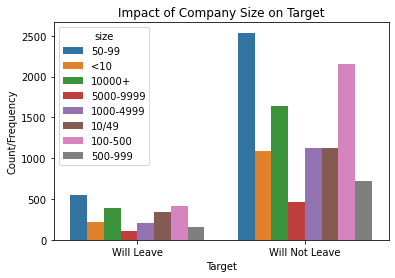

In [14]:
sns.barplot(x = 'target', y = 'count', data = company_size, hue='size')
plt.xlabel('Target')
plt.ylabel('Count/Frequency')
plt.title('Impact of Company Size on Target')

# Correlation Matrix

In [15]:
data = data.drop(columns = ['enrollee_id'])

Text(0.5, 1.0, 'Correlation Matrix')

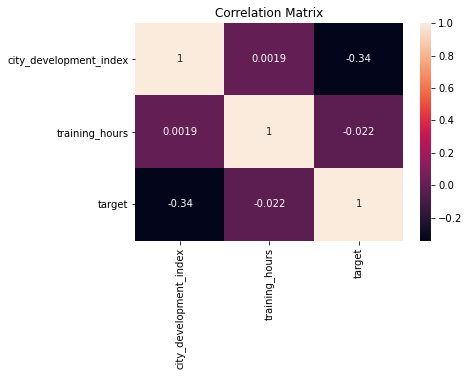

In [16]:
correlation = data.corr()
sns.heatmap(correlation, annot = True)
plt.title('Correlation Matrix')

# Top 5 city with frequent job change

In [17]:
city_frequency = list()
unique_cities = data['city'].unique()
for city_id, city in enumerate(unique_cities):
    temp = data[(data['city'] == city) & (data['target'] == 1.0)]
    frequency = temp.shape[0]
    city_frequency.append([city, frequency])
city_data = pd.DataFrame(city_frequency, columns = ['city_name', 'frequency'])
sorted_city_frequency = city_data.sort_values(by = 'frequency', ascending = False)

Text(0.5, 1.0, 'Top 5 city with frequent job change')

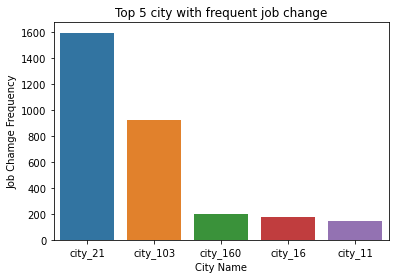

In [18]:
top = 5
top_five = sorted_city_frequency.iloc[:top, :]
sns.barplot(x = 'city_name', y='frequency', data = top_five)
plt.xlabel('City Name')
plt.ylabel('Job Chamge Frequency')
plt.title('Top 5 city with frequent job change')

# Training Hours Histogram

In [19]:
data['training_hours'].median(axis=0)

47.0

Text(0.5, 0, 'Training Hours')

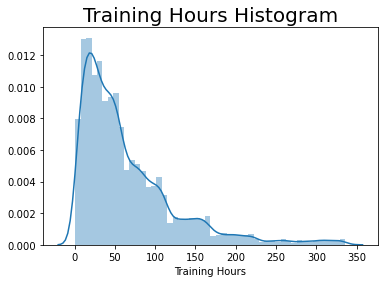

In [20]:
sns.distplot(a = data['training_hours'])
plt.title('Training Hours Histogram', fontsize=20)
plt.xlabel('Training Hours')

# Target Distribution  

Text(0.5, 1.0, 'Class Distribution')

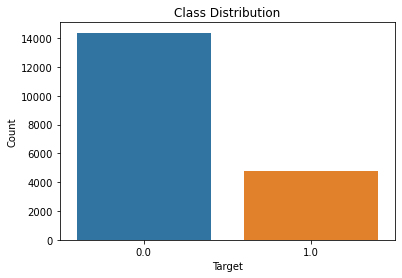

In [21]:
sns.countplot(x = 'target', data = data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution')

# Experience Category over Target

In [22]:
data['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [23]:
temp = list()
unique_experience = data['relevent_experience'].unique()
for eg in unique_experience:
    relevant_data = data[(data['relevent_experience'] == eg) & (data['target']==1)]
    non_relevant_data = data[(data['relevent_experience'] == eg ) & (data['target']==0)]
    temp.append([eg, 'target_1', relevant_data.shape[0]])
    temp.append([eg, 'target_0', non_relevant_data.shape[0]])
    
experience_data = pd.DataFrame(temp, columns = ['experience', 'target', 'count'])
experience_data

,experience,target,count
0,Has relevent experience,target_1,2961
1,Has relevent experience,target_0,10831
2,No relevent experience,target_1,1816
3,No relevent experience,target_0,3550


Text(0, 0.5, 'Count')

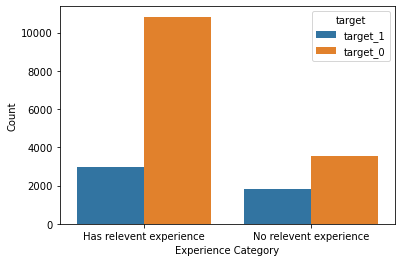

In [24]:
sns.barplot(x = 'experience', y = 'count', hue = 'target', data = experience_data)
plt.xlabel('Experience Category')
plt.ylabel('Count')